In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [2]:
year='2018'
hists = load('../hists/darkhiggs'+year+'.scaled')

lumis = { #Values from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable                                                      
        '2016': "35.92",
        '2017': "41.53",
        '2018': "59.74"
    }
lumi=lumis[year]

fail_binning_dict={
    '2016': [0,0.53],
    '2017': [0,0.61],
    '2018': [0,0.65]
}
pass_binning_dict={
    '2016': [0.53,1],
    '2017': [0.61,1],
    '2018': [0.65,1]
}

fail_binning=fail_binning_dict[year]
pass_binning=pass_binning_dict[year]

data={
    '2016':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2017':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2018':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'EGamma',
        'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'EGamma',
        'gcr': 'EGamma'
    },
}

data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']

mass_binning = [
    #0,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    120,
    150,
    180,
    240,
    300,
]
bkg_hists['template']=bkg_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass', mass_binning))
signal_hists['template']=signal_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))
data_hists['template']=data_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))

recoil_binning = [250, 310, 370, 470, 590, 3000]
bkg_hists['template']=bkg_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
signal_hists['template']=signal_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
data_hists['template']=data_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
    

In [10]:
exp = 0
tot_bkg_yld_array={():0}

region = 'tecr'
category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}
category=1
sys='nominal'
    
print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('Recoil bins:',signal_hists['template'].axis('recoil').edges()[()].size-1,signal_hists['template'].axis('recoil').edges()[()])
#print('Mass bins:',signal_hists['template'].axis('fjmass').edges()[()].size-1,signal_hists['template'].axis('fjmass').edges()[()])
#print('Systematic:', sys)
#print('------------------------')
print('------------------------')
print('------------------------')
for p in bkg_hists['template'].identifiers('process'):
    bkg_yld_array = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).values()#(overflow='all')
    if () in bkg_yld_array:
        yld = bkg_yld_array[()][:,:,category].sum()
        tot_bkg_yld_array[()]+=bkg_yld_array[()]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

if not (region == 'sr' and category==1):
    yld_array = data_hists['template'].integrate('region',region).integrate('process', data[year][region]).integrate('systematic',sys).values()#(overflow='all')
    if () in yld_array:
        yld = yld_array[()][:,:,category].sum()
        print('Total observed:', '%.1f' % yld)   
print('------------------------')

if (region == 'sr' and category==1):
    for p in signal_hists['template'].identifiers('process'):
        sig_yld_array = signal_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).values()#(overflow='all')
        if () in sig_yld_array:
            yld = sig_yld_array[()][:,:,category].sum()
            print(p, '%.1f' % yld)
            #print(p,'S/B %.3f' % (yld/exp))
            print(p,'Significance %.1f' % (yld/np.sqrt(exp)))
            binned_significance=0
            for recoil in range(0,signal_hists['template'].axis('recoil').edges()[()].size-2):
                for mass in range(0,signal_hists['template'].axis('fjmass').edges()[()].size-2):
                    pice=np.nan_to_num(sig_yld_array[()][recoil,mass,category].sum()/np.sqrt(tot_bkg_yld_array[()][recoil,mass,category].sum()))
                    binned_significance=binned_significance+(pice*pice)
            print(p,'Binned Sig. %.2f' % np.sqrt(binned_significance))
            print('------------------------')


------------------------
------------------------
Category: tecr pass
------------------------
------------------------
Hbb 15.0
DY+HF 5.1
DY+LF 3.4
WW 7.6
WZ 11.5
ZZ 0.0
ST 740.9
TT 9179.9
W+HF 203.5
W+LF 165.2
QCD 23.6
------------------------
Total expected: 10355.7
------------------------
Total observed: 8006.0
------------------------


In [ ]:
###
# To optimize cuts based on process yield, i.e. you wanna test some background rejection
###

exp = 0
region = 'wmcr'
category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}
category=1
variable = 'fj1pt'
cut_bin = 0
nbins = data_hists[variable].integrate('region').integrate('process', 'MET').values(overflow='all')[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('------------------------')
if cut_bin!=None: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
#if cut_bin!=None: print(variable,'< %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #yld = yld_array[()].sum()
        #if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')

if not region == '':
    yld_array = data_hists[variable].integrate('region',region).integrate('process', data[year][region]).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #yld = yld_array[()].sum()
        #if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

In [ ]:
###
# Plot mass or recoil out of template
###

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
    
    
def plot_template(category, var):
    varlist=['recoil','fjmass']
    varlist.remove(var)

    binning={
        'pass': pass_binning,
        'fail': fail_binning,
    }

    C={
        'pass':'Pass',
        'fail':'Fail',
        '':''
    }
    R={
        'sr':'Signal Region',
        'wmcr':'Single Muon W CR',
        'tmcr':'Single Muon Top CR',
        'wecr':'Single Electron W CR',
        'tecr':'Single Electron Top CR'
    }

    #Rebin to pick either pass or fail
    bkg_hists_template=bkg_hists['template']
    process = hist.Cat("process", "Process", sorting="placement")
    cats = ("process",)
    bkg_map = OrderedDict()
    bkg_map["Hbb"] = ("Hbb*",)
    bkg_map["QCD"] = ("QCD*",)
    bkg_map["VV"] = (["WW", "WZ", "ZZ"],)
    bkg_map["ST"] = (["ST"],)
    bkg_map["TT"] = (["TT"],)
    bkg_map["W+jets"] = (["W+HF","W+LF"],)
    bkg_map["Z+jets"] = (["DY+HF","Z+HF","DY+LF","Z+LF"],)
    bkg_hists_template = bkg_hists_template.group(cats, process, bkg_map)
    signal_hists_template=signal_hists['template']
    data_hists_template=data_hists['template']
    if category is not '':
        bkg_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        signal_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        data_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        

    for j in bkg_hists_template.identifiers('region'):
        if 't' in str(j) and category=='fail': continue
        #if not (str(j) == 'tecr'): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#99ffff', '#ccffcc', '#ffcc66', '#ff9999', '#ffff99', '#ffccff', '#ccccff']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))

       
        plot.plot1d(bkg_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD'),
                        overlay="process",
                        ax=ax,
                        clear=False,
                        stack=True,
                        fill_opts=fill_opts,
                        error_opts=error_opts
                        )
    
        if not ('sr' in str(j) and category=='pass'):

            plot.plot1d(data_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD')[data[year][str(j)]],            
                        overlay="process",
                        ax=ax,
                        clear=False,
                        error_opts=data_err_opts
                        )
        
            plot.plotratio(data_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD').integrate('process',data[year][str(j)]), 
                       bkg_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD').sum('process'),
                       ax=rax,
                       #overflow='over',
                       error_opts=data_err_opts,
                       denom_fill_opts={},
                       guide_opts={},
                       unc='num'
                       )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')

        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')

        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]]+" "+C[category], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
        plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
        plot_name = 'stack_'+str(j)+'_'+category+'_'+var+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))
        
plot_template('pass', 'fjmass')
plot_template('fail', 'fjmass')
plot_template('pass', 'recoil')
plot_template('fail', 'recoil')

In [ ]:
###
# Plot other variables
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler
    
    
def plot_var(category, var=None):
    
    binning={
        'pass': pass_binning,
        'fail': fail_binning,
    }

    C={
        'pass':'Pass',
        'fail':'Fail',
        '':''
    }
    R={
        'sr':'Signal Region',
        'wmcr':'Single Muon W CR',
        'tmcr':'Single Muon Top CR',
        'wecr':'Single Electron W CR',
        'tecr':'Single Electron Top CR'
    }

    for key in bkg_hists.keys():
        
        if key=='sumw': continue
        if key=='template': continue
        if key=='cutflow': continue
        if key=='ZHbbvsQCD': continue
        if var and var not in key: continue
        
        #Rebin to pick either pass or fail
        bkg_hists_var=bkg_hists[key]
        process = hist.Cat("process", "Process", sorting="placement")
        cats = ("process",)
        bkg_map = OrderedDict()
        bkg_map["Hbb"] = ("Hbb*",)
        bkg_map["QCD"] = ("QCD*",)
        bkg_map["VV"] = (["WW", "WZ", "ZZ"],)
        bkg_map["ST"] = (["ST"],)
        bkg_map["TT"] = (["TT"],)
        bkg_map["W+jets"] = (["W+HF","W+LF"],)
        bkg_map["Z+jets"] = (["DY+HF","Z+HF","DY+LF","Z+LF"],)
        bkg_hists_var = bkg_hists_var.group(cats, process, bkg_map)
        signal_hists_var=signal_hists[key]
        data_hists_var=data_hists[key]
        if category is not '':
            bkg_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            signal_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            data_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            
        
        for j in bkg_hists_var.identifiers('region'):
            if 't' in str(j) and category=='fail': continue
            #if not (str(j) == 'tecr'): continue
            plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
            fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
            error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
            nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
            data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
            colors = ['#99ffff', '#ccffcc', '#ffcc66', '#ff9999', '#ffff99', '#ffccff', '#ccccff']


            fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
            fig.subplots_adjust(hspace=.07)
            ax.set_prop_cycle(cycler(color=colors))

       
            plot.plot1d(bkg_hists_var.integrate('region',j).sum('ZHbbvsQCD'),
                            overlay="process",
                            ax=ax,
                            clear=False,
                            stack=True,
                            fill_opts=fill_opts,
                            error_opts=error_opts
                            )
    
            if not ('sr' in str(j) and category=='pass'):

                plot.plot1d(data_hists_var.integrate('region',j).sum('ZHbbvsQCD')[data[year][str(j)]],            
                            overlay="process",
                            ax=ax,
                            clear=False,
                            error_opts=data_err_opts
                            )

                plot.plotratio(data_hists_var.integrate('region',j).sum('ZHbbvsQCD').integrate('process',data[year][str(j)]), 
                           bkg_hists_var.integrate('region',j).sum('ZHbbvsQCD').sum('process'),
                           ax=rax,
                           #overflow='over',
                           error_opts=data_err_opts,
                           denom_fill_opts={},
                           guide_opts={},
                           unc='num'
                           )
        
            rax.set_ylabel('Ratio (data/MC)')
            rax.set_ylim(0.0,2.0)
            rax.grid(axis='y')

            ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
            args = {'linestyle':'--', 'linewidth': 5}
            ax.autoscale(axis='x', tight=True)
            ax.set_yscale('log')
            ax.set_ylim(.1, None)
            leg = ax.legend(ncol=2, loc='best')

            coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]]+" "+C[category], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
            lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
            os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
            plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
            plot_name = 'stack_'+str(j)+'_'+category+'_'+key+'.png'
            fig.savefig(os.path.join(plot_path, plot_name))
        
plot_var('pass')
plot_var('fail')

In [ ]:
###
# N-1 of the fat jet tagger
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler

R={
    'sr':'Signal Region',
    'wmcr':'Single Muon W CR',
    'tmcr':'Single Muon Top CR',
    'wecr':'Single Electron W CR',
    'tecr':'Single Electron Top CR'
}

bkg_hists_ZHbbvsQCD=bkg_hists['ZHbbvsQCD']
process = hist.Cat("process", "Process", sorting="placement")
cats = ("process",)
bkg_map = OrderedDict()
bkg_map["Hbb"] = ("Hbb*",)
bkg_map["QCD"] = ("QCD*",)
bkg_map["VV"] = (["WW", "WZ", "ZZ"],)
bkg_map["ST"] = (["ST"],)
bkg_map["TT"] = (["TT"],)
bkg_map["W+jets"] = (["W+HF","W+LF"],)
bkg_map["Z+jets"] = (["DY+HF","Z+HF","DY+LF","Z+LF"],)
bkg_hists_ZHbbvsQCD = bkg_hists_ZHbbvsQCD.group(cats, process, bkg_map)
signal_hists_ZHbbvsQCD=signal_hists['ZHbbvsQCD']
data_hists_ZHbbvsQCD=data_hists['ZHbbvsQCD']
        
for j in bkg_hists_ZHbbvsQCD.identifiers('region'):
    #if 't' in str(j): continue
    #if not (str(j) == 'tecr'): continue
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#99ffff', '#ccffcc', '#ffcc66', '#ff9999', '#ffff99', '#ffccff', '#ccccff']


    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))

       
    plot.plot1d(bkg_hists_ZHbbvsQCD.integrate('region',j),
                    overlay="process",
                    ax=ax,
                    clear=False,
                    stack=True,
                    fill_opts=fill_opts,
                    error_opts=error_opts
                    )

    if not 'sr' in str(j):

        plot.plot1d(data_hists_ZHbbvsQCD.integrate('region',j)[data[year][str(j)]],            
                    overlay="process",
                    ax=ax,
                    clear=False,
                    error_opts=data_err_opts
                    )

        plot.plotratio(data_hists_ZHbbvsQCD.integrate('region',j).integrate('process',data[year][str(j)]), 
                   bkg_hists_ZHbbvsQCD.integrate('region',j).sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
    rax.set_ylabel('Ratio (data/MC)')
    rax.set_ylim(0.0,2.0)
    rax.grid(axis='y')

    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend(ncol=2, loc='best')

    coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    
    os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
    plot_name = 'stack_'+str(j)+'_ZHbbvsQCD.png'
    fig.savefig(os.path.join(plot_path, plot_name))


In [ ]:
###
# N-1 of the fat jet tagger unstack plot
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler

bkg_hists_ZHbbvsQCD=bkg_hists['ZHbbvsQCD'].integrate('region','sr')
signal_hists_ZHbbvsQCD=signal_hists['ZHbbvsQCD'].integrate('region','sr')

process = hist.Cat("process", "Process", sorting="placement")
cats = ("process",)

bkg_map = OrderedDict()
#bkg_map["Hbb"] = ("Hbb*",)
#bkg_map["V+jets"] = (["DY+HF","W+HF","Z+HF"],)
#bkg_map["VV"] = (["WW", "WZ", "ZZ"],)
#bkg_map["Top"] = (["ST","TT"],)
#bkg_map["QCD"] = ("QCD*",)
bkg_map["Background"] = (["DY+LF","W+LF","Z+LF","DY+HF","W+HF","Z+HF","QCD","ST","TT","WW", "WZ", "ZZ"],)

sig_map = OrderedDict()
sig_map["mhs50"] = ("Mz1000_mhs50_Mdm150*",)
sig_map["mhs70"] = ("Mz1000_mhs70_Mdm150*",)
sig_map["mhs90"] = ("Mz1000_mhs90_Mdm150*",)

bkg_hists_ZHbbvsQCD = bkg_hists_ZHbbvsQCD.group(cats, process, bkg_map)
signal_hists_ZHbbvsQCD = signal_hists_ZHbbvsQCD.group(cats, process, sig_map)
        
plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#cccccc','#0000ff','#000000','#ff0000']


fig, ax = plt.subplots(figsize=(13,11), sharex=True)
ax.set_prop_cycle(cycler(color=colors))

line_opts = {'linestyle':'dashdot', 'linewidth':3}
line_opts2 = {'linestyle':'-'}
error_opts = {'linewidth': 0}

print(bkg_hists_ZHbbvsQCD.integrate('process','Background'))
plot.plot1d(bkg_hists_ZHbbvsQCD,
                overlay="process",
                ax=ax,
                clear=False,
                density=True,
                line_opts=line_opts2,
                )

plot.plot1d(signal_hists_ZHbbvsQCD,
                overlay="process",
                ax=ax,
                clear=False,
                density=True,
                line_opts=line_opts,
                )

ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
ax.set_ylim(.1, None)
leg = ax.legend(ncol=2, loc='best')

coffee = plt.text(0., 1., u"☕ "+'Signal Region', fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
plot_name = 'unstack_sr_ZHbbvsQCD.png'
fig.savefig(os.path.join(plot_path, plot_name))



In [ ]:
###
# Plot mass or recoil out of template
###

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
    
    
def plot_template(var):
    varlist=['recoil','fjmass']
    varlist.remove(var)

    bkg_hists_template=bkg_hists['template'].integrate('region','sr')
    signal_hists_template=signal_hists['template'].integrate('region','sr')
    
    process = hist.Cat("process", "Process", sorting="placement")
    cats = ("process",)

    bkg_map = OrderedDict()
    bkg_map["Background"] = (["DY+LF","W+LF","Z+LF","DY+HF","W+HF","Z+HF","QCD","ST","TT","WW", "WZ", "ZZ"],)

    sig_map = OrderedDict()
    if 'fjmass' in var or 'recoil' in var:
        sig_map["mhs50"] = ("Mz1000_mhs50_Mdm150*",)
        sig_map["mhs70"] = ("Mz1000_mhs70_Mdm150*",)
        sig_map["mhs90"] = ("Mz1000_mhs90_Mdm150*",)
    else:
        sig_map["mZprime200"] = ("Mz200_mhs50_Mdm100*",)
        sig_map["mZprime1000"] = ("Mz1000_mhs50_Mdm150*",)
        sig_map["mZprime3000"] = ("Mz3000_mhs50_Mdm1000*",)

    bkg_hists_template = bkg_hists_template.group(cats, process, bkg_map)
    signal_hists_template = signal_hists_template.group(cats, process, sig_map)
    
    bkg_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
    signal_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
    
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#cccccc','#0000ff','#000000','#ff0000']

    fig, ax = plt.subplots(figsize=(13,11), sharex=True)
    ax.set_prop_cycle(cycler(color=colors))

    line_opts = {'linestyle':'dashdot', 'linewidth':3}
    line_opts2 = {'linestyle':'-'}
    error_opts = {'linewidth': 0}

    plot.plot1d(bkg_hists_template.integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD'),
                    overlay="process",
                    ax=ax,
                    clear=False,
                    density=True,
                    line_opts=line_opts2,
                    )
    
    plot.plot1d(signal_hists_template.integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD'),
                    overlay="process",
                    ax=ax,
                    clear=False,
                    density=True,
                    line_opts=line_opts,
                    )

    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    if 'recoil' in var:
        ax.set_yscale('log')
        ax.set_ylim(.000001, None)
    leg = ax.legend(ncol=2, loc='best')

    coffee = plt.text(0., 1., u"☕ "+'Signal Region Pass', fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    
    os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
    plot_name = 'unstack_sr_pass_'+var+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))
        
plot_template('fjmass')
#plot_template('recoil')

In [ ]:
###
# Preparing to plot systematics
###

process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
bkg_syst_map = OrderedDict()
bkg_syst_map["W+jets"] = ("W+*",)
bkg_syst_map["Z+jets"] = ("Z+*",)
bkg_syst_map["TT"] = ("TT*",)
bkg_syst_hists=bkg_hists['template'].group(cats, process, bkg_syst_map)

systematic = hist.Cat("systematic", "systematics", sorting='placement')
cats = ("systematic",)
btag_map = OrderedDict()
btag_map["nominal"] = ("nominal", )
btag_map["btagDown"] = ("btagDown*", )
btag_map["btagUp"] = ("btagUp*", )
ewk1_map = OrderedDict()
ewk1_map["nominal"] = ("nominal", )
ewk1_map["ew1Down"] = ("ew1Down", )
ewk1_map["ew1Up"] = ("ew1Up", )
ewk1_map["mixDown"] = ("mixDown", )
ewk1_map["mixUp"] = ("mixUp", )
ewk2_map = OrderedDict()
ewk2_map["nominal"] = ("nominal", )
ewk2_map["ew2GDown"] = ("ew2GDown", )
ewk2_map["ew2GUp"] = ("ew2GUp", )
ewk2_map["ew2WDown"] = ("ew2WDown", )
ewk2_map["ew2WUp"] = ("ew2WUp", )
ewk2_map["ew2ZDown"] = ("ew2ZDown", )
ewk2_map["ew2ZUp"] = ("ew2ZUp", )
ewk3_map = OrderedDict()
ewk3_map["nominal"] = ("nominal", )
ewk3_map["ew3GDown"] = ("ew3GDown", )
ewk3_map["ew3GUp"] = ("ew3GUp", )
ewk3_map["ew3WDown"] = ("ew3WDown", )
ewk3_map["ew3WUp"] = ("ew3WUp", )
ewk3_map["ew3ZDown"] = ("ew3ZDown", )
ewk3_map["ew3ZUp"] = ("ew3ZUp", )
qcd_map = OrderedDict()
qcd_map["nominal"] = ("nominal", )
qcd_map["qcd1Down"] = ("qcd1Down", )
qcd_map["qcd1Up"] = ("qcd1Up", )
qcd_map["qcd2Down"] = ("qcd2Down", )
qcd_map["qcd2Up"] = ("qcd2Up", )
qcd_map["qcd3Down"] = ("qcd3Down", )
qcd_map["qcd3Up"] = ("qcd3Up", )
mu_map = OrderedDict()
mu_map["nominal"] = ("nominal", )
mu_map["muFDown"] = ("muFDown", )
mu_map["muFUp"] = ("muFUp", )
mu_map["muRDown"] = ("muRDown", )
mu_map["muRUp"] = ("muRUp", )

syst_hists={
    'btag':bkg_syst_hists.group(cats, systematic, btag_map),
    'ewk1':bkg_syst_hists.group(cats, systematic, ewk1_map),
    'ewk2':bkg_syst_hists.group(cats, systematic, ewk2_map),
    'ewk3':bkg_syst_hists.group(cats, systematic, ewk3_map),
    'qcd':bkg_syst_hists.group(cats, systematic, qcd_map),
    'mu':bkg_syst_hists.group(cats, systematic, mu_map)
}

In [ ]:
###
# Plot b-tag systematic
###

import matplotlib.patches as patches

def plot_btag(region, var):
    varlist=['recoil','fjmass']
    varlist.remove(var)
    
    ttsr=syst_hists['btag'].integrate('region','sr').integrate('process', 'TT').sum(varlist[0],'ZHbbvsQCD',overflow='all')
    for syst in ttsr.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        ttsr.values()[(str(syst),)]/=ttsr.values()[('nominal',)]
    ttsr.values()[('nominal',)]/=ttsr.values()[('nominal',)]
    
    tt=syst_hists['btag'].integrate('region',region).integrate('process', 'TT').sum(varlist[0],'ZHbbvsQCD',overflow='all')
    for syst in tt.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        tt.values()[(str(syst),)]/=tt.values()[('nominal',)]
        tt.values()[(str(syst),)]/=ttsr.values()[(str(syst),)]
    
    tt.values()[('nominal',)]/=ttsr.values()[('nominal',)]
    tt.values()[('nominal',)]/=tt.values()[('nominal',)]
    
    fig, ax = plt.subplots(figsize=(13,11), sharex=True)
    
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    plot = hist.plot1d(tt,overlay='systematic',error_opts=None,line_opts={'linestyle':'solid'})
    plot.set_ylim(0.9, 1.1)
    plt.text(0.02, 0.98, '$TT^{'+region+'}/TT^{sr}$',
            fontsize=20, 
            horizontalalignment='left',
            verticalalignment='top', transform=ax.transAxes)
    
    os.system('mkdir -p ../plots/darkhiggs/systematics/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/systematics/'+year+'/')
    plot_name = 'btag_'+region+'_pass_'+var+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))
plot_btag('tecr', 'fjmass')
plot_btag('tmcr', 'fjmass')
plot_btag('tecr', 'recoil')
plot_btag('tmcr', 'recoil')

In [ ]:
###
# Plot NLO systematics
###

import matplotlib.patches as patches

def plot_nlo(systematic):

    w=syst_hists[systematic].integrate('region','sr').integrate('process', 'W+jets').sum('fjmass','ZHbbvsQCD',overflow='all')
    for syst in w.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        w.values()[(str(syst),)]/=w.values()[('nominal',)]
    w.values()[('nominal',)]/=w.values()[('nominal',)]

    zw=syst_hists[systematic].integrate('region','sr').integrate('process', 'Z+jets').sum('fjmass','ZHbbvsQCD',overflow='all')
    for syst in zw.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        zw.values()[(str(syst),)]/=zw.values()[('nominal',)]
        zw.values()[(str(syst),)]/=w.values()[(str(syst),)]

    fig, ax = plt.subplots(figsize=(13,11), sharex=True)
    
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    plot = hist.plot1d(zw,overlay='systematic',error_opts=None,line_opts={'linestyle':'solid'})
    plot.set_ylim(0.9, 1.1)
    
    plot.text(0.02, 0.98, 'Z/W',
            fontsize=20, 
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    
    os.system('mkdir -p ../plots/darkhiggs/systematics/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/systematics/'+year+'/')
    plot_name = systematic+'_sr_fail_recoil.png'
    fig.savefig(os.path.join(plot_path, plot_name))


for key in syst_hists:
    if 'btag' in key: continue
    plot_nlo(key)

In [ ]:
###
# Plot the pass/fail ratio for Z/W+jets as a function of the jet mass in each recoil bin
###

def plot_1Dratio(vj,recoil):
    vjets_hists = {}
    pass_hists  = {}
    fail_hists  = {}

    vjets_hists['template']=bkg_hists['template']

    process = hist.Cat("process", "Process", sorting='placement')
    cats = ("process",)
    sig_map = OrderedDict()
    vjets_map = OrderedDict()
    vjets_map["W+jets"] = ("W+*",)
    vjets_map["Z+jets"] = ("Z+*",)
    vjets_hists['template']=vjets_hists['template'].group(cats, process, vjets_map)
    recoil_binning_dict = {
            '0': [250, 310], 
            '1': [310, 370], 
            '2': [370, 470], 
            '3': [470, 590], 
            '4': [590, 3000]
    }
    #vjets_hists['template']=vjets_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning_dict[str(recoil)]))

    pass_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
    fail_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',fail_binning))

    #http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    from cycler import cycler
    
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    plot.plotratio(pass_hists['template'].integrate('region','sr').integrate('systematic','nominal').integrate('process',vj).sum('recoil','ZHbbvsQCD'),
                fail_hists['template'].integrate('region','sr').integrate('systematic','nominal').integrate('process',vj).sum('recoil','ZHbbvsQCD'),
                ax=ax,
                #overflow='over',
                error_opts=data_err_opts,
                denom_fill_opts={},
                guide_opts={},
                unc='num'
                )
    ax.set_ylabel(vj)
    ax.set_ylim(0.01,0.3)
    ax.grid(axis='y')
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    coffee = plt.text(0., 1., u"☕ "+'Pass/Fail Ratio, Recoil '+str(recoil), fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    os.system('mkdir -p ../plots/darkhiggs/systematics/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/systematics/'+year+'/')
    plot_name = '1Dratio_sr_recoil'+str(recoil)+'_'+vj+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

for i in range(5):
    plot_1Dratio('Z+jets',i)
    plot_1Dratio('W+jets',i)

In [ ]:
###
# Plot the pass/fail ratio for Z/W+jets as a function of the jet mass in each recoil bin
###

vjets_hists = {}
pass_hists  = {}
fail_hists  = {}

vjets_hists['template']=bkg_hists['template']

process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
vjets_map = OrderedDict()
#vjets_map["DY+jets"] = ("DY+*",)
vjets_map["W+jets"] = ("W+*",)
vjets_map["Z+jets"] = ("Z+*",)
#vjets_map["G+jets"] = ("G+*",)
for key in vjets_hists.keys():
    vjets_hists[key]=vjets_hists[key].group(cats, process, vjets_map)
    
pass_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
fail_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',fail_binning))
pass_zjets=pass_hists['template'].integrate('process','Z+jets').integrate('region','sr').integrate('systematic','nominal').sum('ZHbbvsQCD')
fail_zjets=fail_hists['template'].integrate('process','Z+jets').integrate('region','sr').integrate('systematic','nominal').sum('ZHbbvsQCD')
pass_wjets=pass_hists['template'].integrate('process','W+jets').integrate('region','sr').integrate('systematic','nominal').sum('ZHbbvsQCD')
fail_wjets=fail_hists['template'].integrate('process','W+jets').integrate('region','sr').integrate('systematic','nominal').sum('ZHbbvsQCD')

msdbins=pass_zjets.axis('fjmass').edges()
recoilbins=pass_zjets.axis('recoil').edges()
X, Y = np.meshgrid(recoilbins[:-1] + 0.3 * np.diff(recoilbins), msdbins[:-1] + 0.5 * np.diff(msdbins), indexing='ij')

def plot2D(X, Y, Z, Process):
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
    #surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
    #                       linewidth=0, antialiased=False)
    ax.plot_wireframe(X, Y, Z, rstride=20, cstride=20)
    ax.set_title(Process)
    ax.set_xlabel('Mass',fontsize = 14)
    ax.set_ylabel('Recoil',fontsize = 14)
    ax.set_zlabel('Pass/Fail Ratio',fontsize = 14)
    plt.show()
    os.system('mkdir -p ../plots/darkhiggs/systematics/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/systematics/'+year+'/')
    plot_name = '2Dratio_sr_'+Process+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

Z=np.array(pass_zjets.values()[()])/np.array(fail_zjets.values()[()])
plot2D(X, Y, Z, 'Z+jets')
Z=np.array(pass_wjets.values()[()])/np.array(fail_wjets.values()[()])
plot2D(X, Y, Z, 'W+jets')
# Customize the z axis.
#ax.set_zlim(0.04, 0.11)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()

sr 2018 fail 0
Which process hbbMC hbbMC
Which process qcdMC qcdMC
Which process vvMC vvMC
Which process stMC stMC
Which process ttMC ttMC
Which process wjets wjets
Which process zjets zjets
sr 2018 pass 0
Which process hbbMC hbbMC
Which process qcdMC qcdMC
Which process vvMC vvMC
Which process stMC stMC
Which process ttMC tt
Which process wjets wjets
Which process zjets zjets
sr 2018 fail 1
Which process hbbMC hbbMC
Which process qcdMC qcdMC
Which process vvMC vvMC
Which process stMC stMC
Which process ttMC ttMC
Which process wjets wjets
Which process zjets zjets
sr 2018 pass 1
Which process hbbMC hbbMC
Which process qcdMC qcdMC
Not found, skip this process
Remove its label too 

Which process vvMC vvMC
Which process stMC stMC
Which process ttMC tt
Which process wjets wjets
Which process zjets zjets
sr 2018 fail 2
Which process hbbMC hbbMC
Which process qcdMC qcdMC
Which process vvMC vvMC
Which process stMC stMC
Which process ttMC ttMC
Which process wjets wjets
Which process zjets zje

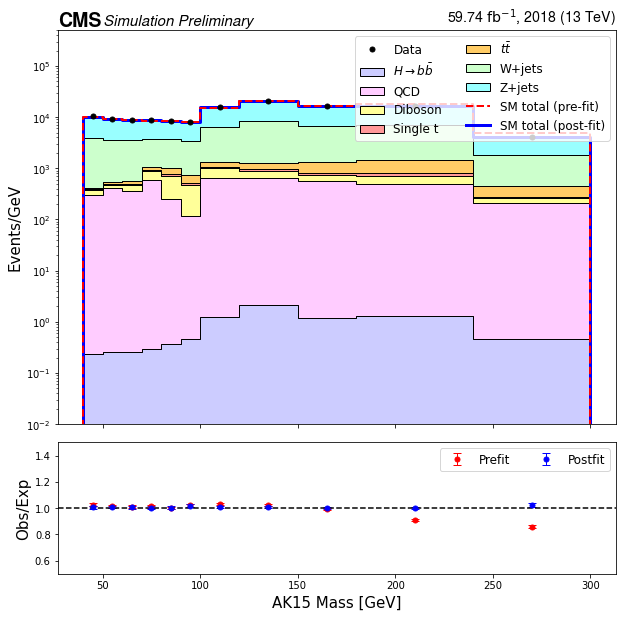

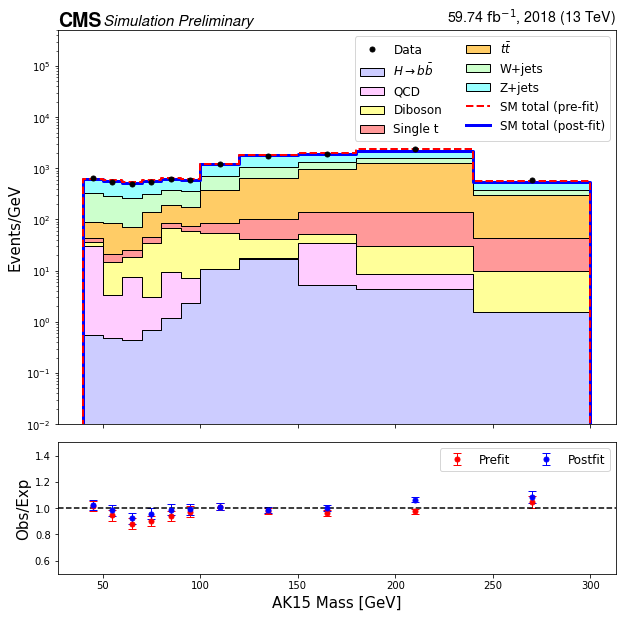

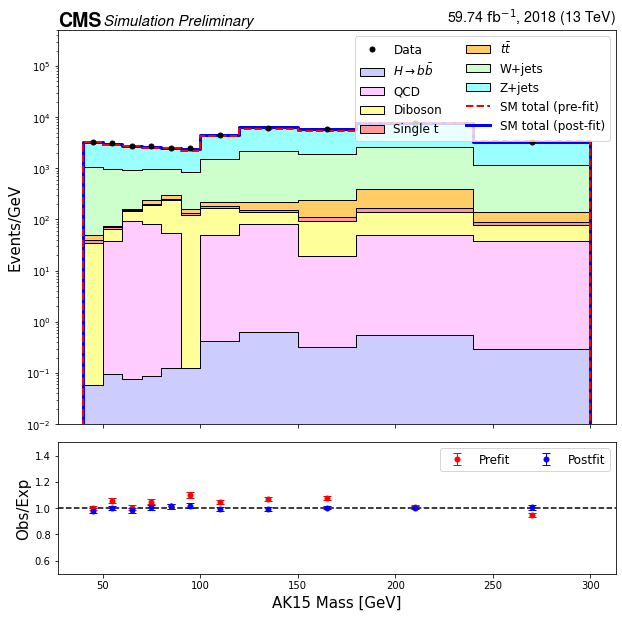

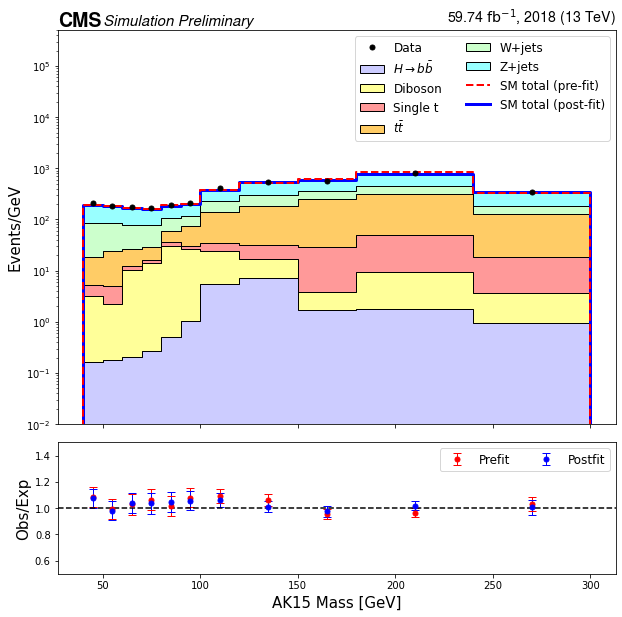

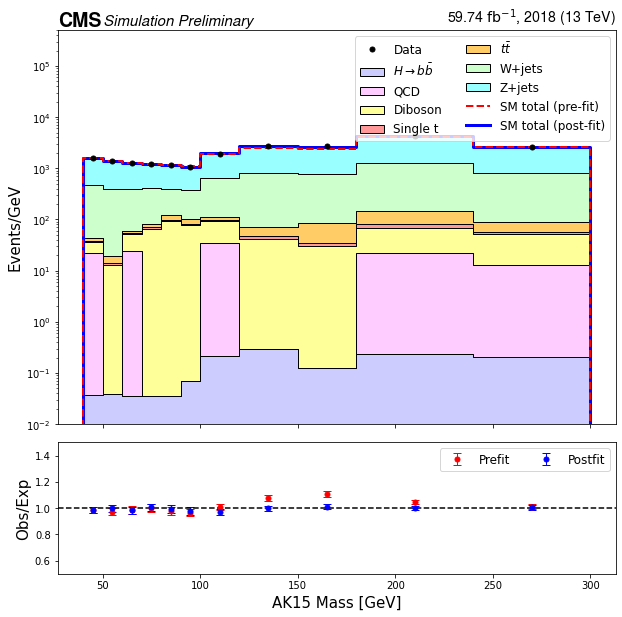

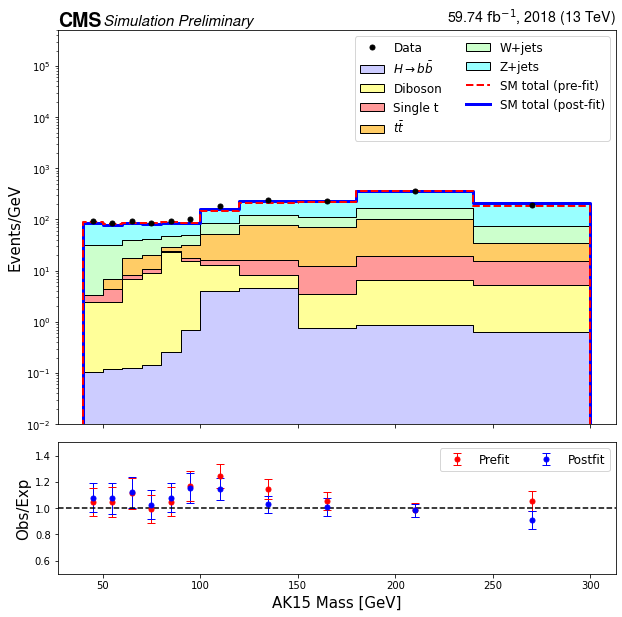

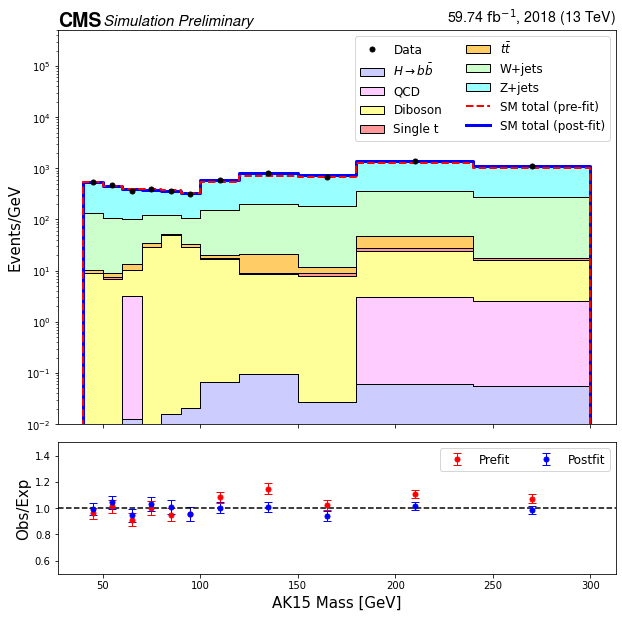

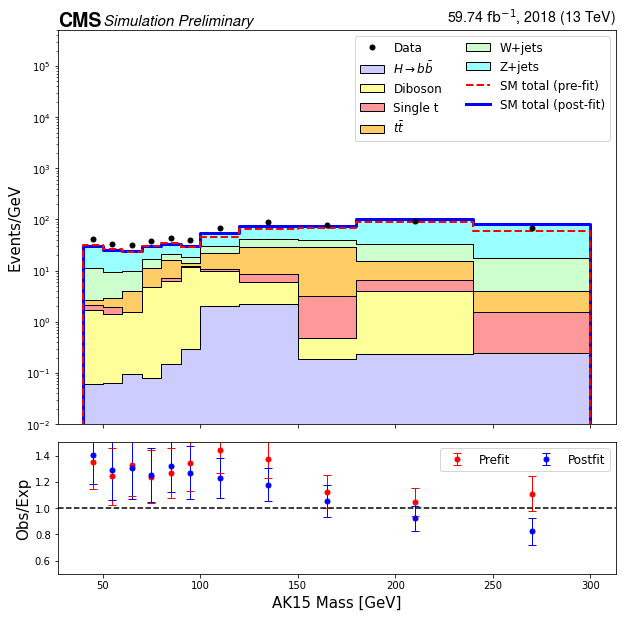

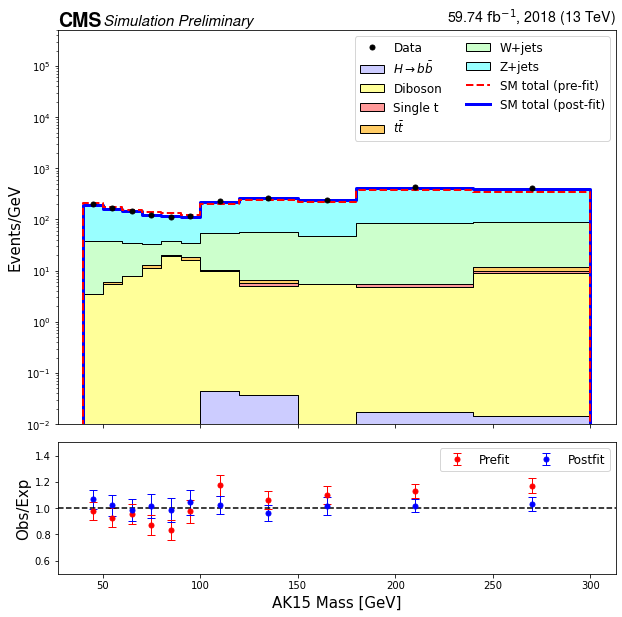

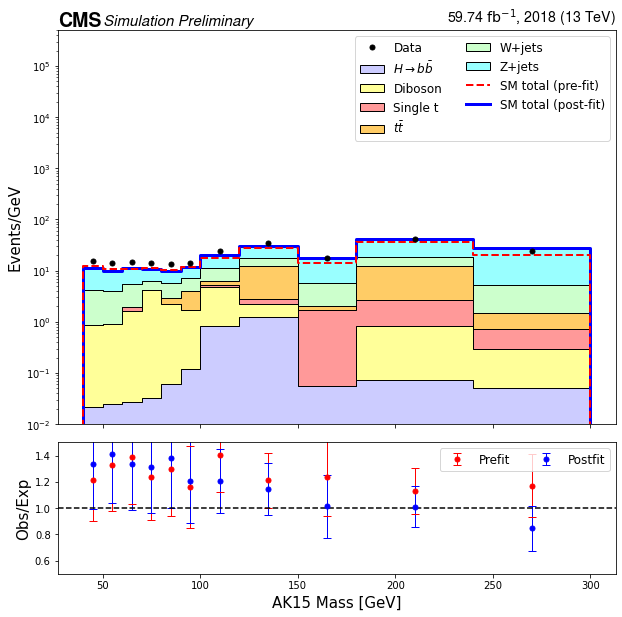

In [6]:
###
# Postfit plots
###

import uproot as up
from cycler import cycler
import mplhep as hep
import matplotlib.pyplot as plt

#hep.style.use("CMS")

processNames = {
    'qcdMC': 'QCD',
    'tt': r'$t\bar{t}$',
    'ttMC': r'$t\bar{t}$',
    'stMC': 'Single t',
    'vvMC': 'Diboson',
    'hbbMC': r'$H\rightarrow b\bar{b}$',
    'dyjetsMC': 'DY+jets',
    'wjets': 'W+jets',
    'wjetsMC': 'W+jets',
    'zjets': 'Z+jets'
    #'Mhs_50': 'Signal'
}

#colors = ['#99ffff', '#ccffcc', '#ffcc66', '#ff9999', '#ffff99', '#ffccff', '#ccccff']
#bkg_map["Hbb"] = ("Hbb*",)
#bkg_map["QCD"] = ("QCD*",)
#bkg_map["VV"] = (["WW", "WZ", "ZZ"],)
#bkg_map["ST"] = (["ST"],)
#bkg_map["TT"] = (["TT"],)
#bkg_map["W+jets"] = (["W+HF","W+LF"],)
#bkg_map["Z+jets"] = (["DY+HF","Z+HF","DY+LF","Z+LF"],)
colorDict = {
    'DY+jets': '#99ffff',
    r'$H\rightarrow b\bar{b}$': '#ccccff',
    'QCD': '#ffccff',
    'Diboson': '#ffff99',
    'Single t': '#ff9999',
    r'$t\bar{t}$': '#ffcc66',
    'W+jets': '#ccffcc',
    'Z+jets':'#99ffff'
}
mc_labels40to120 = ['DY+jets','Z+jets', r'$H\rightarrow b\bar{b}$', 'QCD', 'Diboson', 'Single t', r'$t\bar{t}$', 'W+jets']
mc_labels120to300 = ['DY+jets', 'Z+jets', r'$H\rightarrow b\bar{b}$', 'QCD', 'Diboson', 'Single t', r'$t\bar{t}$', 'W+jets']
    
def plot_postfit(region, year, category, recoil, processes40to120, processes120to300):
    print(region, year, category, recoil)
    identifier40to120 = region+year+category+'mass40to120recoil'+recoil
    identifier120to300 = region+year+category+'mass120to300recoil'+recoil
    
    f = up.open("../hists/darkhiggs.postfit")

    prefit_dir40to120 = f[identifier40to120+'_prefit']
    postfit_dir40to120 = f[identifier40to120+'_postfit']

    prefit_dir120to300 = f[identifier120to300+'_prefit']
    postfit_dir120to300 = f[identifier120to300+'_postfit']

    totbkg40to120 = prefit_dir40to120["TotalBkg"].values.tolist()
    edges40to120 = prefit_dir40to120["TotalBkg"].edges.tolist()
    #print(prefit40to120, edges40to120)

    totbkg120to300 = prefit_dir120to300["TotalBkg"].values.tolist()
    edges120to300 = prefit_dir120to300["TotalBkg"].edges.tolist()
    edges120to300 = np.delete(edges120to300, 0) ## remove duplicate number
    #print(prefit120to300, edges120to300)

    totbkg_bin = np.concatenate((totbkg40to120, totbkg120to300), axis=None)
    total_edges = np.concatenate((edges40to120, edges120to300), axis=None)

    totbkg = totbkg_bin.tolist()
    edges = total_edges.tolist()

    fig, (ax, rax) = plt.subplots(2, 1, figsize=(10,10), gridspec_kw=dict(height_ratios=[3, 1], hspace=0.07), sharex=True)
    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.set_ylabel('Events/GeV', fontsize=15)
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.set_yscale('log')
    ax.set_ylim(1e-2, 5e+5)
    hep.cms.label(ax=ax, loc=0, lumi=lumi, year=year, fontsize=15)

    ### Move to draw postfit
    sum_prefit = np.zeros(len(edges)-1)
    sum_postfit = np.zeros(len(edges)-1)
    process_bin = []
    mc_list = []

    keys40to120 = []
    for i in postfit_dir40to120.keys():
        keys40to120.append(str(i).replace('b\'','').replace(';1\'',''))
    keys120to300 = []
    for i in postfit_dir120to300.keys():
        keys120to300.append(str(i).replace('b\'','').replace(';1\'',''))

    for (i, j) in zip(processes40to120, processes120to300):
        print('Which process', i, j)
        if not i in keys40to120:
            print('Not found, skip this process')
            print('Remove its label too \n')
            continue
        else:
            prefit40to120 = prefit_dir40to120[i].values
            postfit40to120 = postfit_dir40to120[i].values

        if not j in keys120to300:
            print('Not found, skip this process')
            print('Remove its label too \n')
            continue
        else:
            prefit120to300 = prefit_dir120to300[j].values
            postfit120to300 = postfit_dir120to300[j].values

        prefit_bin = np.concatenate((prefit40to120, prefit120to300), axis=None)
        postfit_bin = np.concatenate((postfit40to120, postfit120to300), axis=None)
        sum_prefit += prefit_bin
        sum_postfit += postfit_bin
        process_bin.append(postfit_bin.tolist())
        mc_list.append(processNames[j])

    prefit = sum_prefit.tolist()
    #print('TotalBkg:',totbkg)
    #print('Prefit:',prefit)
    postfit = sum_postfit.tolist()
    colors=[]
    for x in mc_list:
        #print(x,colorDict[x])
        colors.append(colorDict[x])
    colors.reverse()
    #print(mc_list)
    #print(colors)
    ax.set_prop_cycle(cycler(color=colors))

    ### Try to draw stack plots
    hep.histplot(process_bin, edges, ax=ax, stack=True, histtype='fill', edgecolor = 'k', linewidth=1, label=mc_list)

    ### Draw Stat. unc.
    #ax.stairs(
    #    values=sum_postfit + np.sqrt(sum_postfit),
    #    baseline=sum_postfit - np.sqrt(sum_postfit),
    #    edges=edges, **errps, label='Stat. unc.')

    hep.histplot(postfit, edges, ax=ax, label=["SM total (post-fit)"], color='b', linewidth=3)
    hep.histplot(prefit, edges, ax=ax, label=["SM total (pre-fit)"], color='r', linestyle='dashed', linewidth=2)

    ### Call data ###
    data40to120 = postfit_dir40to120["data_obs"].values
    data120to300 = postfit_dir120to300["data_obs"].values
    data = np.concatenate((data40to120, data120to300), axis=None)
    #print('Data:',data)
    hep.histplot(data, edges, ax=ax, histtype='errorbar', label="Data", color='k')

    from hist.intervals import ratio_uncertainty
    yerr = ratio_uncertainty(data, sum_postfit, 'poisson')
    #rax.stairs(1+yerr[1], edges=edges, baseline=1-yerr[0], **errps)

    hep.histplot(data/prefit, edges, yerr=np.sqrt(data)/prefit, ax=rax, histtype='errorbar', color='r', capsize=4, label="Prefit")
    hep.histplot(data/sum_postfit, edges, yerr=np.sqrt(data)/sum_postfit, ax=rax, histtype='errorbar', color='b', capsize=4, label="Postfit")

    rax.axhline(1, ls='--', color='k')
    rax.set_ylim(0.5, 1.5)
    rax.set_xlabel('AK15 Mass [GeV]', fontsize=15)
    rax.set_ylabel('Obs/Exp', fontsize=15)#, loc='center')
    rax.legend(loc='upper right', fontsize=12, ncol=2)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=12, ncol=2)
    os.system('mkdir -p ../plots/darkhiggs/postfit/'+year+'/')
    plot_path = os.path.abspath('../plots/darkhiggs/postfit/'+year+'/')
    plot_name = region+'_'+category+'_recoil'+recoil+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))


#sr 
for i in range(4):
    #fail
    processes40to120 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjets', 'zjets']
    processes120to300 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjets', 'zjets']
    plot_postfit('sr', year, 'fail', str(i), processes40to120, processes120to300)

    #sr pass
    processes40to120 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjets', 'zjets']
    processes120to300 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'tt', 'wjets', 'zjets']
    plot_postfit('sr', year, 'pass', str(i), processes40to120, processes120to300)
    
#fail
processes40to120 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjets', 'zjets']
processes120to300 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjets', 'zjets']
plot_postfit('sr', year, 'fail', '4', processes40to120, processes120to300)

#sr pass
processes40to120 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjetsMC', 'zjets']
processes120to300 = ['hbbMC', 'qcdMC', 'vvMC', 'stMC', 'ttMC', 'wjetsMC', 'zjets']
plot_postfit('sr', year, 'pass', '4', processes40to120, processes120to300)



In [11]:
import pandas as pd

def DF(value, year='', cl=''):
    limit_Mz = []
    limit_Mdm = []
    limit_lm = []
    limit_mhs = []

    path='../logs/condor/fit/out/darkhiggs'+year+'_*mhs*_'+cl+'expAsymptoticLimits'
    logs=path.split('/')[-1]
    folder=path.replace(logs,'')

    for log in os.listdir(folder):
      #if logs.replace('*','') not in log: continue
      if not all(piece in log for piece in logs.split('*')): continue
      for line in open(folder+'/'+log,'r').readlines():
        if 'Observed Limit:' not in line: continue
        if value not in line: continue
        Mz, mhs, Mdm = line.strip().split('<')[0].split(':')[1].replace('_r','').split('_')
        Mz = Mz.replace('Mz','')
        mhs = mhs.replace('mhs','')
        Mdm = Mdm.replace('Mdm','')
        limit = line.strip().split('<')[1]

        limit_lm.append(float(limit))
        limit_Mz.append(float(Mz))
        limit_Mdm.append(float(Mdm))
        limit_mhs.append(mhs)
        
    data = pd.DataFrame(
        {
            #"obs" : 0.02*np.array(limit_lm)[:,1,5]/xsec,
            "exp" : np.array(limit_lm),
            "Mz"  : np.array(limit_Mz),
            "Mdm"  : np.array(limit_Mdm),
            "mhs" : np.array(limit_mhs)
        }
    )
    data = data.sort_values(by=['Mdm'])
    data = data.sort_values(by=['Mz'])
    return pd.DataFrame.from_dict(data)
        
df50 = DF('mhs50')
df70 = DF('mhs70')
df90 = DF('mhs90')
df50cl90 = DF('mhs50','','cl90')
df70cl90 = DF('mhs70','','cl90')
df90cl90 = DF('mhs90','','cl90')

In [12]:
import sys
sys.path.append('../')
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import pyplot as plt
from libs.limitlib import fill_dummy_values, interpolate_rbf, dump_contour_to_txt


pjoin = os.path.join

import mplhep as hep

plt.style.use(hep.style.CMS)

cmap = mcolors.LinearSegmentedColormap.from_list("n", list(reversed([
    # '#fff5f0',
    '#fee0d2',
    '#ffffff',
    '#fcbba1',
    '#fc9272',
    '#fb6a4a',
    '#ef3b2c',
    '#cb181d',
    '#a50f15',
    '#67000d',
    # '#000000',
        ])))

def plot2d(df):
    plt.clf()
    fig = plt.figure(figsize=(14,10))
    ax = plt.gca()
    plt.plot()

    #excluded = df['exp'] < 1

    x = df['Mz']
    y = df['Mdm']
    exp = df['exp']
    #p1s = df['p1s']
    #m1s = df['m1s']
    #p2s = df['p2s']
    #m2s = df['m2s']
    
    #mask = ~((x==1600) & (y==650))
    #x = x[mask]
    #y = y[mask]
    #exp = exp[mask]
    #p1s = p1s[mask]
    #m1s = m1s[mask]
    #p2s = p2s[mask]
    #m2s = m2s[mask]

    contours_filled = np.log10(np.logspace(-1,1,7))
    contours_line = [0]
    
    def get_x_y_z(x,y,z):
        ix, iy, iz = interpolate_rbf(x,y,z,maxval=4000)
        iz [iy>ix] = 1e9 #* np.exp(-(iy/ix))
        if True:
            iz = np.log10(iz)
            iz[iz<min(contours_filled)] = min(contours_filled)
        return ix, iy, iz

    ix, iy, iz = get_x_y_z(x, y, exp)
    CF = plt.contourf(ix, iy, iz, levels=contours_filled, cmap=cmap)
    cb = plt.colorbar()
    for c in CF.collections:
        c.set_edgecolor("face")
        
    args = dict(colors='black',zorder=2,levels=contours_line)
    cs_exp = plt.contour(
                       ix, iy, iz,
                       linestyles=[(0, (5,1))],
                       linewidths=3,
                       **args)
    cs_exp.collections[0].set_label('Median expected')
    
    #cs_p1s=plt.contour(
    #            *get_x_y_z(x,y,p1s),
    #            linestyles=[(0, (3,3))],
    #            linewidths=2,
    #            **args)
    #cs_p1s.collections[0].set_label(r'68% expected')
    #cs_m1s = plt.contour(
    #            *get_x_y_z(x,y,m1s),
    #            linestyles=[(0, (3,3))],
    #            linewidths=2,
    #            **args)
    
    #cs_p2s=plt.contour(
    #            *get_x_y_z(x,y,p2s),
    #            linestyles=[(0, (1,5))],
    #            linewidths=2,
    #            **args)
    #cs_p2s.collections[0].set_label(r'95% expected')
    #cs_m1s = plt.contour(
    #            *get_x_y_z(x,y,m2s),
    #            linestyles=[(0, (1,5))],
    #            linewidths=2,
    #            **args)
    cb.set_label("95% CL observed upper limit on $\log_{10}(\mu)$")
    plt.clim([1e-1,1e1])
    
    ax.set_xlabel("$m_{Z'}$ (GeV)")
    ax.set_ylabel("$m_{DM}$ (GeV)")
    ax = plt.gca()
    ax.set_ylim(int(df['mhs'][0]),1600)

    plt.legend(loc='upper left')

    plt.text(3900,1550,'\n'.join([f'Dark Higgs mass = '+df['mhs'][0]+' GeV','Majorana DM',]), ha='right',va='top')

    #plt.text(2800,1100,"CMS", fontweight='bold', ha='right',va='bottom',fontsize=30)
    hep.cms.label(data=True, year='2016-2018', lumi=137)#, loc=1)#, label="Preliminary")
    plot_path = os.path.abspath('../plots/darkhiggs/results/') 
    plot_name = 'mhs'+df['mhs'][0]+'_2D.png'
    fig.savefig(os.path.join(plot_path, plot_name))
    
    #hep.cms.label(data=True, year='2016-2018', lumi=137, label="Preliminary")
    #for ext in 'pdf','png':
    #    fig.savefig(pjoin(outdir, f"tchan_2d_preliminary.{ext}"))

    #plt.plot(x,y,'+b')
    #for ix, iy, iz in zip(x,y,exp):
    #    plt.text(ix, iy, f"{iz:.7f}",color='b',fontsize=10)

    #for ext in 'pdf','png':
    #    fig.savefig(pjoin(outdir, f"tchan_2d_points.{ext}"))

<Figure size 720x720 with 0 Axes>

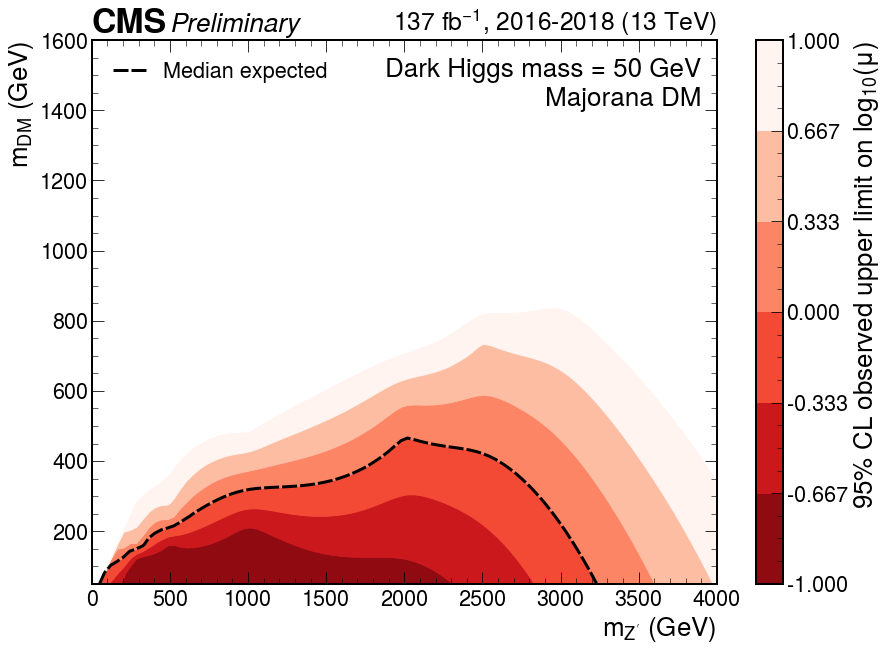

In [13]:
plot2d(df50)

<Figure size 720x720 with 0 Axes>

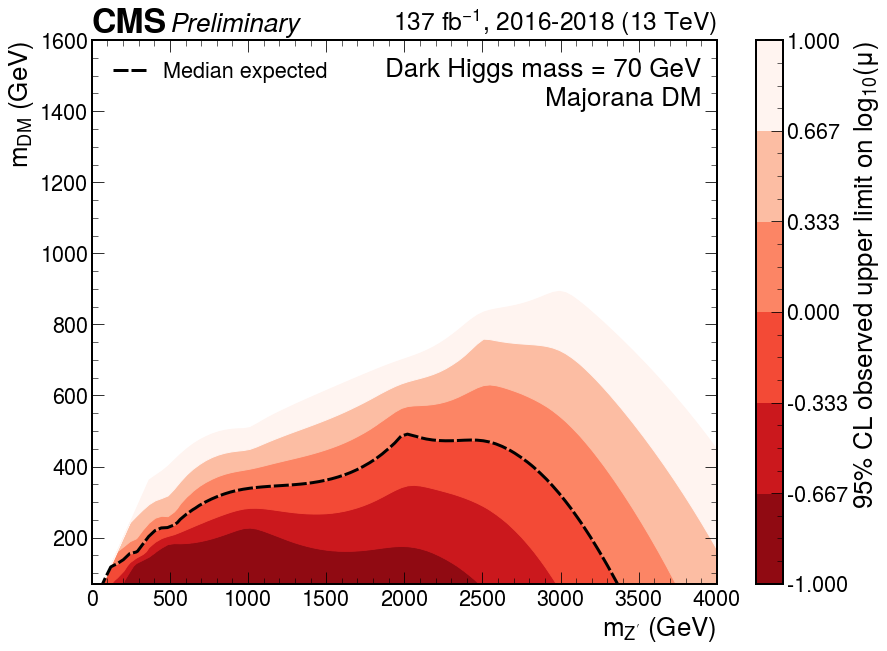

In [14]:
plot2d(df70)

<Figure size 720x720 with 0 Axes>

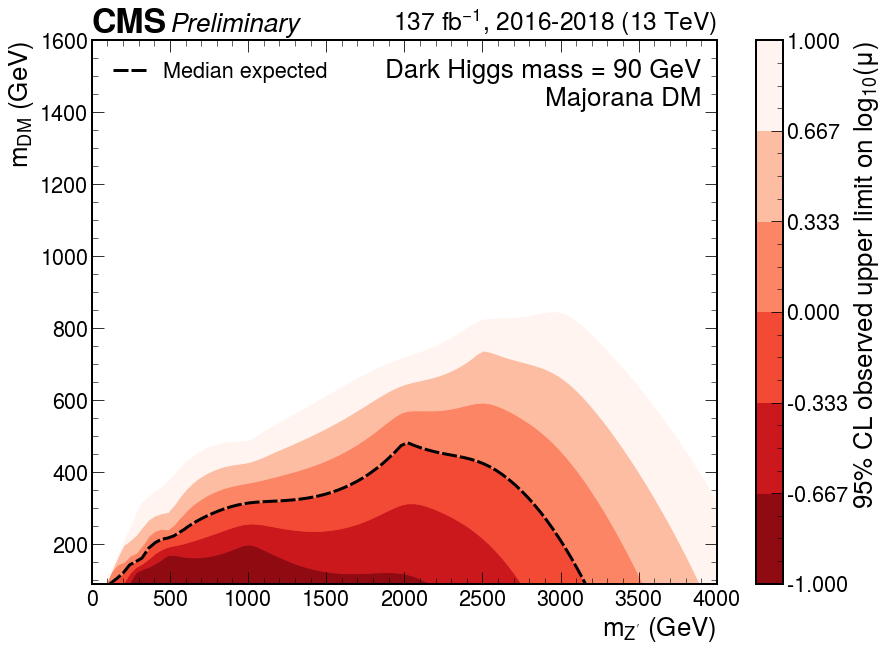

In [15]:
plot2d(df90)

In [16]:
from matplotlib import pyplot as plt
from libs.limitlib import fill_dummy_values, interpolate_rbf, dump_contour_to_txt

def to_array(df):

    #excluded = df['exp'] < 1

    x = df['Mz']
    y = df['Mdm']
    exp = df['exp']
    #p1s = df['p1s']
    #m1s = df['m1s']
    #p2s = df['p2s']
    #m2s = df['m2s']
    
    #mask = ~((x==1600) & (y==650))
    #x = x[mask]
    #y = y[mask]
    #exp = exp[mask]
    #p1s = p1s[mask]
    #m1s = m1s[mask]
    #p2s = p2s[mask]
    #m2s = m2s[mask]

    contours_filled = np.log10(np.logspace(-1,1,7))
    contours_line = [0]
    
    def get_x_y_z(x,y,z):
        ix, iy, iz = interpolate_rbf(x,y,z,maxval=4000)
        iz [iy>ix] = 1e9 #* np.exp(-(iy/ix))
        if True:
            iz = np.log10(iz)
            iz[iz<min(contours_filled)] = min(contours_filled)
        return ix, iy, iz

    ix, iy, iz = get_x_y_z(x, y, exp)
    
        
    cs_exp = plt.contour(ix, iy, iz,levels=contours_line)
    line_exp = np.array(cs_exp.collections[0].get_paths()[0].vertices)
    return line_exp#[line_exp[:,0]>float(df['mhs'][0])]
    #line_obs = np.array(cs_obs.collections[0].get_paths()[0].vertices)

    #plt.plot(line_exp[:,0], line_exp[:,1], "b-" , label="Expected $90\%$ CL")
    #plt.plot(line_obs[:,0], line_obs[:,1], "k-" , label="Observed $90\%$ CL")

    #np.savetxt('../data/limit-exp-'+df['mhs'][0]+'.csv', line_exp, delimiter=',')
    #np.savetxt('limit-obs-'+df['mhs'][0]+'.csv', line_obs[1660:], delimiter=',')

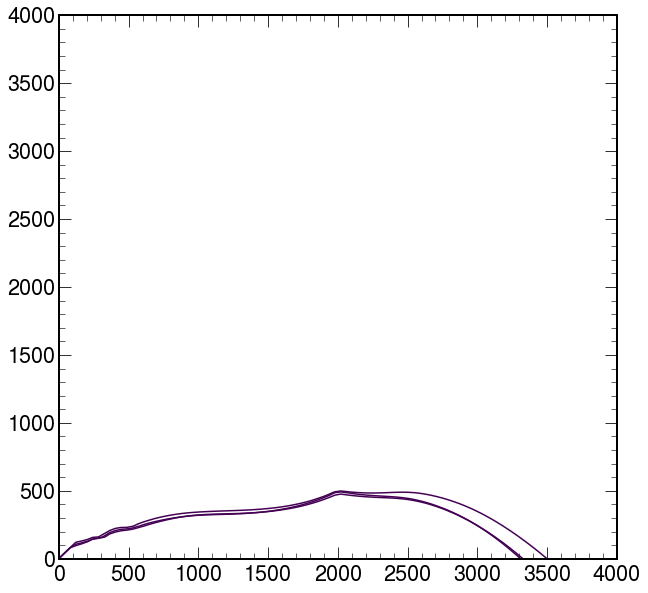

In [17]:
darkhiggs50=to_array(df50cl90)
darkhiggs70=to_array(df70cl90)
darkhiggs90=to_array(df90cl90)

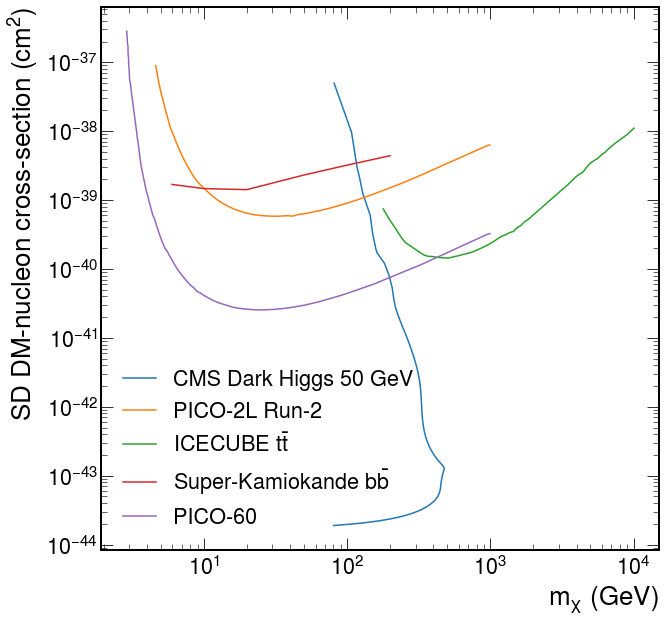

In [26]:
import lhctodd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
vector_model = lhctodd.SD(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 50 GeV")
values=vector_model.from_array(darkhiggs50[:,0],darkhiggs50[:,1])
values=values[values[:,1]>50.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SD")
plt.legend()

os.system('mkdir -p ../plots/darkhiggs/results/')
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'mhs50_SD.png'
fig.savefig(os.path.join(plot_path, plot_name))

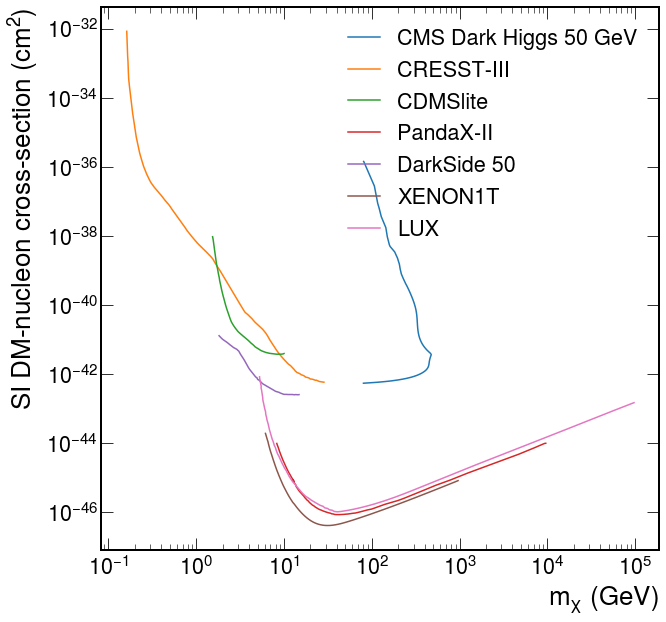

In [27]:
import lhctodd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
vector_model = lhctodd.SI(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 50 GeV")
values=vector_model.from_array(darkhiggs50[:,0],darkhiggs50[:,1])
values=values[values[:,1]>50.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SI")
plt.legend()

os.system('mkdir -p ../plots/darkhiggs/results/')
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'mhs50_SI.png'
fig.savefig(os.path.join(plot_path, plot_name))

In [ ]:
import lhctodd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
vector_model = lhctodd.SD(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 70 GeV")
values=vector_model.from_array(darkhiggs70[:,0],darkhiggs70[:,1])
values=values[values[:,1]>70.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SD")
plt.legend()

os.system('mkdir -p ../plots/darkhiggs/results/')
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'mhs70_SD.png'
fig.savefig(os.path.join(plot_path, plot_name))

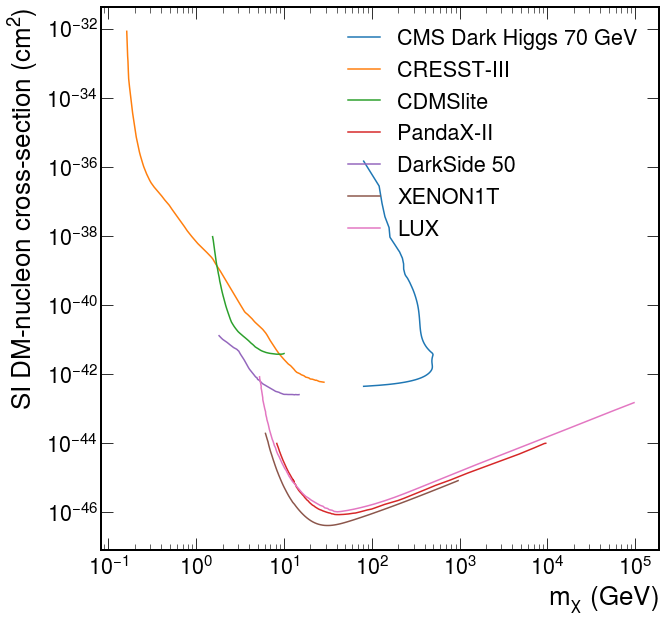

<Figure size 1008x720 with 0 Axes>

In [21]:
import lhctodd
import matplotlib.pyplot as plt
vector_model = lhctodd.SI(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 70 GeV")
values=vector_model.from_array(darkhiggs70[:,0],darkhiggs70[:,1])
values=values[values[:,1]>70.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SI")
plt.legend()
fig = plt.figure(figsize=(14,10))
os.system('mkdir -p ../plots/darkhiggs/results/')
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'mhs70_SI.png'
fig.savefig(os.path.join(plot_path, plot_name))

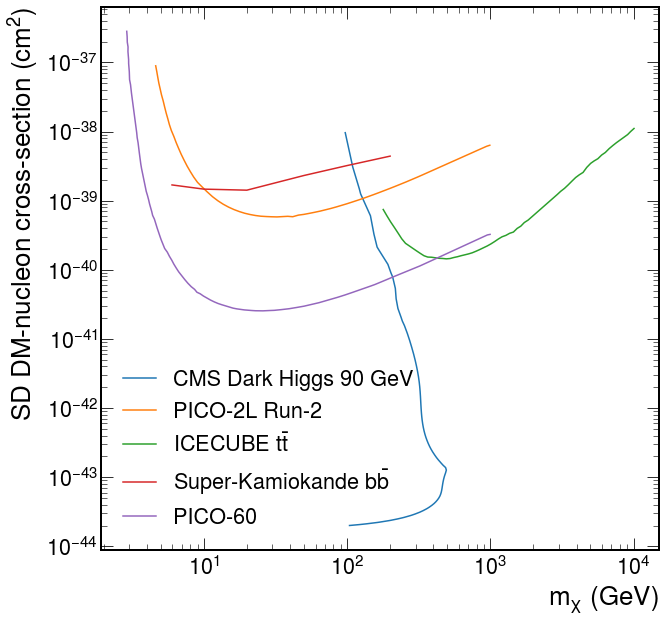

<Figure size 1008x720 with 0 Axes>

In [22]:
import lhctodd
import matplotlib.pyplot as plt
vector_model = lhctodd.SD(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 90 GeV")
values=vector_model.from_array(darkhiggs90[:,0],darkhiggs90[:,1])
values=values[values[:,1]>90.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SD")
plt.legend()
fig = plt.figure(figsize=(14,10))
plot_path = os.path.abspath('../plots/darkhiggs/results/') 
plot_name = 'mhs90_SD.png'
fig.savefig(os.path.join(plot_path, plot_name))

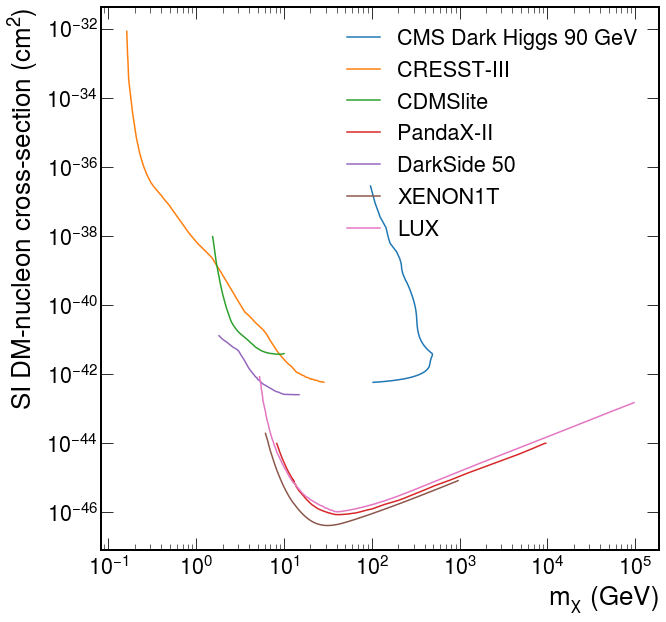

<Figure size 1008x720 with 0 Axes>

In [23]:
import lhctodd
import matplotlib.pyplot as plt
vector_model = lhctodd.SI(g_chi=1.0, g_quark=0.25, label="CMS Dark Higgs 90 GeV")
values=vector_model.from_array(darkhiggs90[:,0],darkhiggs90[:,1])
values=values[values[:,1]>90.]
plt.plot(values[:,1], values[:,0],label= vector_model.label)
lhctodd.plot_all(limit_type="SI")
plt.legend()
fig = plt.figure(figsize=(14,10))
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'mhs90_SI.png'
fig.savefig(os.path.join(plot_path, plot_name))